## Importing basic libraries and reading the data:

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the data
df = pd.read_csv('framingham.csv')

# To display first 5 rows in the dataframe 
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
# To display last 5 rows in the dataframe 
df.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [4]:
# To know the data type and null values if any
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


- From df.info() we can see that there are null values. Hence cleaning the data is important.

## Data Cleaning:

In [5]:
# Percentage of null values in each column
(df.isnull().sum()/df.shape[0])*100

male               0.000000
age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64

##### Missing values for the column eduction may be they arent litrate. Hence filling the missing values with '0':

In [6]:
df.education.fillna(0,inplace=True)

##### Missing values in column cigsPerDay are from smokers, hence imputing it with median of current smoker:

In [7]:
df.cigsPerDay.fillna(df.cigsPerDay.where(df.currentSmoker==1).median(),inplace=True)

##### Missing values in column BPMeds may be because they are not on medication, hence filling missing values with '0':

In [8]:
df.BPMeds.fillna(0,inplace=True)

##### Missing values in column totChol are being imputed with median:

In [9]:
df['totChol'].fillna(df.totChol.median(),inplace=True)

##### Missing values in column BMI are being imputed with median:

In [10]:
df['BMI'].fillna(df.BMI.median(),inplace=True)

##### In column heartRate, there is only 1 missing value in the column and its for active smoker, hence filling it with median heartrate for Smoker:

In [11]:
df['heartRate'].fillna(df['heartRate'].where(df['currentSmoker']==1).median(),inplace=True)

##### In column glucose, majority of missing values are not diabetic hence the missing values imouted will Be the median of non diabetic:

In [12]:
df['glucose'].fillna(df['glucose'].where(df['diabetes']==0).median(),inplace=True)

In [13]:
# Checking if there are any misisng values:
(df.isnull().sum()/df.shape[0])*100

male               0.0
age                0.0
education          0.0
currentSmoker      0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64

In [14]:
# Five point summary of clean data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.429245,0.495027,0.00,0.0000,0.0,1.0000,1.0
age,4240.0,49.580189,8.572942,32.00,42.0000,49.0,56.0000,70.0
education,4240.0,1.930425,1.053026,0.00,1.0000,2.0,3.0000,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.0000,0.0,1.0000,1.0
cigsPerDay,4240.0,9.081132,11.916119,0.00,0.0000,0.0,20.0000,70.0
BPMeds,4240.0,0.029245,0.168513,0.00,0.0000,0.0,0.0000,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.0000,0.0,0.0000,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.0000,0.0,1.0000,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.0000,0.0,0.0000,1.0
totChol,4240.0,236.667689,44.328480,107.00,206.0000,234.0,262.0000,696.0


In [15]:
# To know the data type of column are affected
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [16]:
# Names of columns of dataframe
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [17]:
# List of columns names with contineous values
col = ['age','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

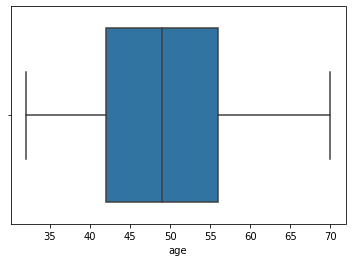

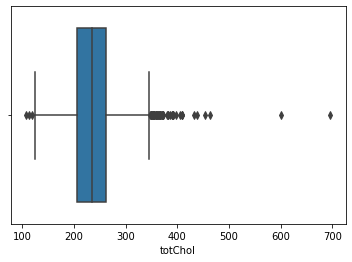

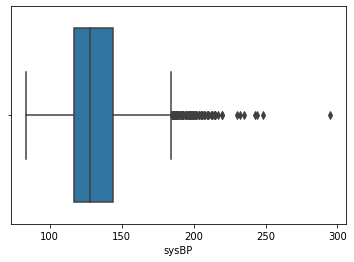

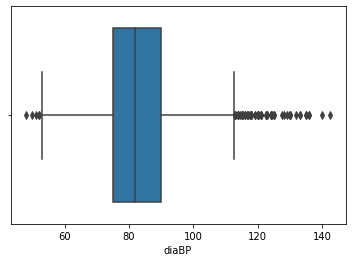

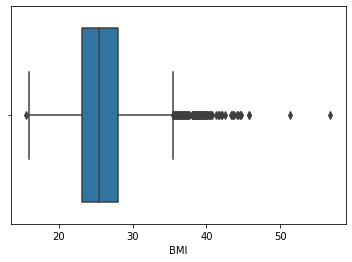

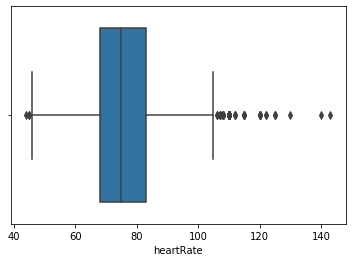

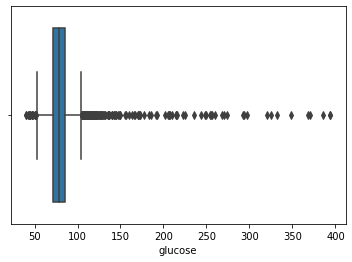

In [18]:
# To find outliers
for i in col:
    sns.boxplot(df[i])
    plt.show()

- There are outliers in the columns 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'
- Hence removing outliers may be needed

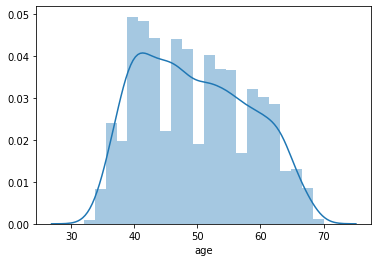

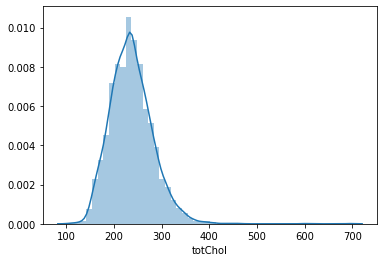

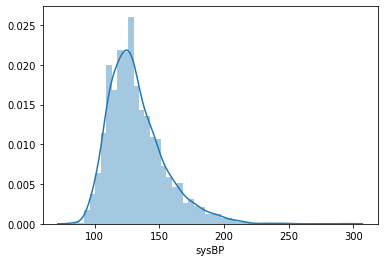

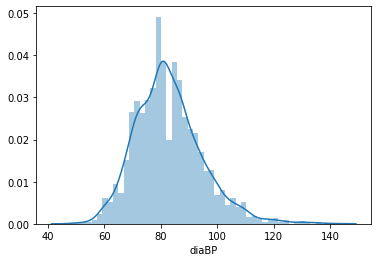

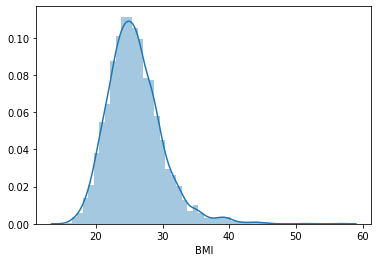

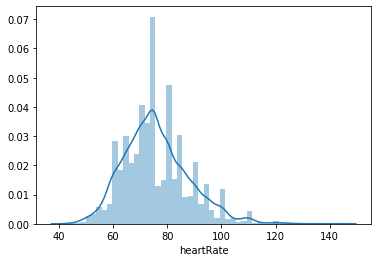

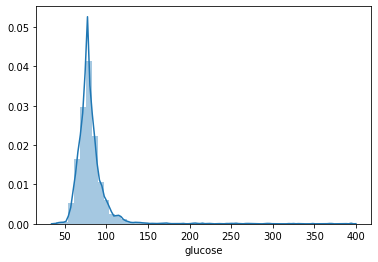

In [19]:
# Distribution of the contineous values column
for i in col:
    sns.distplot(df[i])
    plt.show()

In [20]:
# Making a copy of the clean dataframe
df1 = df.copy()

# To remove outliers
for i in col:
    q1 = df1[i].quantile(q=0.25)
    q2 = df1[i].quantile()
    q3 = df1[i].quantile(q=0.75)
    iqr = q3-q1
    ul = q3+1.5*iqr
    ll = q1-1.5*iqr

    df1 = df1[(df1[i]<ul ) & (df1[i]>ll)] 

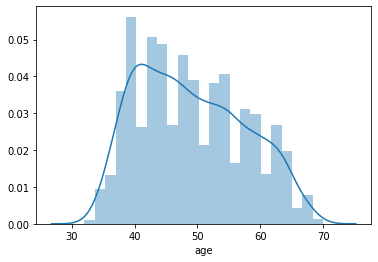

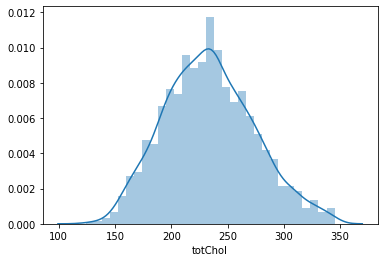

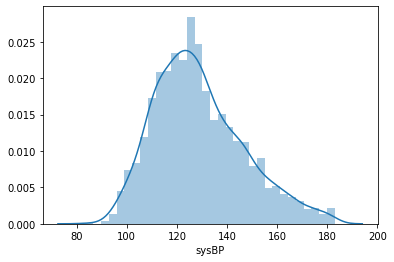

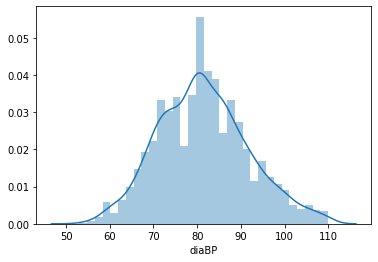

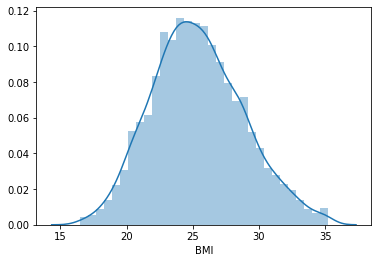

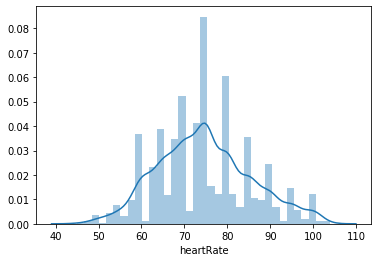

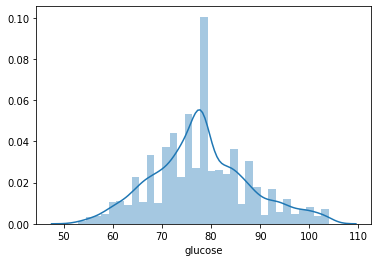

In [21]:
# Checking distribution of the contineous values column after outliers treatment

for i in col:
    sns.distplot(df1[i])
    plt.show()

- After outlier treatment, the distribution look normal.

In [22]:
print('There were {} rows before outlier treatment.'.format(df.shape[0]))
print('There are {} rows after outlier treatment.'.format(df1.shape[0]))
print('After outlier treatment number of rows lost are {}.'.format(df.shape[0] - df1.shape[0]))

There were 4240 rows before outlier treatment.
There are 3639 rows after outlier treatment.
After outlier treatment number of rows lost are 601.


## Exploratory Data Analysis:

In [23]:
# Ratio of CHD=1 and CHD=0
df1['TenYearCHD'].value_counts(normalize=True)

0    0.866996
1    0.133004
Name: TenYearCHD, dtype: float64

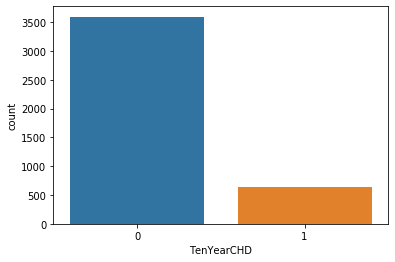

In [24]:
# Ploting the ratio
sns.countplot(df['TenYearCHD'],)
plt.show()

The chart shows that 13.3% of the group had Heart disease.

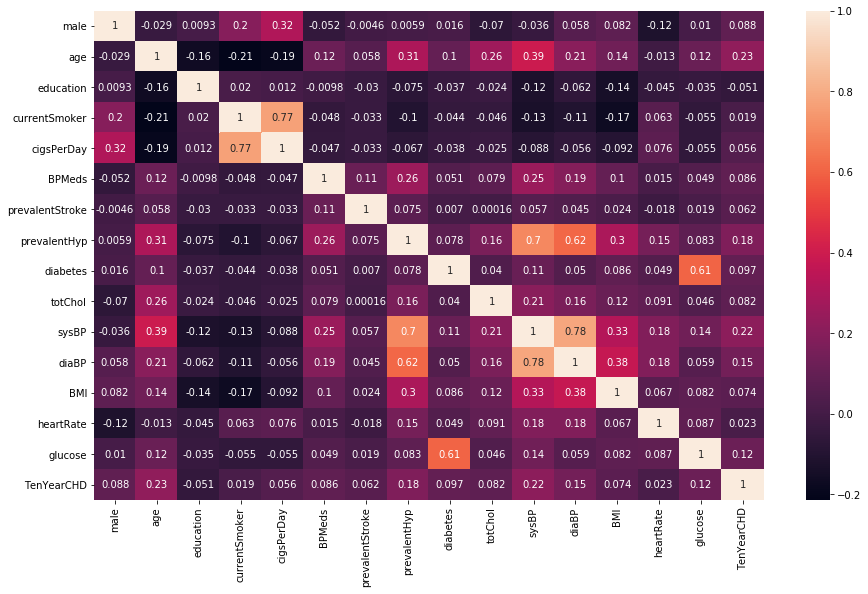

In [25]:
# Correlation plot using heatmap
cor = df.corr()
plt.figure(figsize=(15,9))
sns.heatmap(cor,annot=True)
plt.show()

##### Splitting the data into dependant and independent:

In [26]:
X = df1.drop(['TenYearCHD'], axis=1)
y = df1['TenYearCHD']

## Modelling:

### Using stats model:

In [27]:
import statsmodels.api as sm

X_const = sm.add_constant(X)

In [28]:
model = sm.Logit(y, X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.365105
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3639
Model:                          Logit   Df Residuals:                     3624
Method:                           MLE   Df Model:                           14
Date:                Mon, 14 Sep 2020   Pseudo R-squ.:                 0.06874
Time:                        16:25:51   Log-Likelihood:                -1328.6
converged:                       True   LL-Null:                       -1426.7
Covariance Type:            nonrobust   LLR p-value:                 3.349e-34
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
male                0.4652      0.111      4.183      0.000       0.247       0.683
age                 0.0488      0.007      7.498      0.000       0.036       0.062
education          -0.0951      0.048     -1.985      0.047      -0.189      -0.001
currentSmoker      -0.1563      0.160     -0.975      0.329      -0.470       0.158
cigsPerDay          0.0199      0.006      3.164      0.002       0.008       0.032
BPMeds              0.0611      0.301      0.203      0.839      -0.529       0.651
prevalentStroke     1.1482      0.518      2.215      0.027       0.132       2.164
prevalentHyp        0.7822      0.137      5.727      0.000       0.515       1.050
diabetes           -0.0138      0.645     -0.021      0.983      -1.279       1.251
totChol            -0.0007      0.001     -0.526      0.599      -0.003       0.002
sysBP               0.0103      0.005      2.171      0.030       0.001       0.020
diaBP              -0.0285      0.007     -3.934      0.000      -0.043      -0.014
BMI                -0.0400      0.015     -2.623      0.009      -0.070      -0.010
heartRate          -0.0120      0.005     -2.610      0.009      -0.021      -0.003
glucose            -0.0218      0.005     -4.644      0.000      -0.031      -0.013
===================================================================================
"""

In [29]:
## Backward elimination to drop insignificant variables one by one

cols = list(X.columns)
p = []
while len(cols)>1:
    X = X[cols]
    model= sm.Logit(y, X).fit().pvalues
    p =pd.Series(model.values[1:],index=X.columns[1:])
    pmax = max(p)
    pid = p.idxmax()
    if pmax>0.05:
        cols.remove(pid)
        print('Variable removed:', pid, pmax)
    else:
        break
cols   

Optimization terminated successfully.
         Current function value: 0.365105
         Iterations 6
Variable removed: diabetes 0.9829064606295307
Optimization terminated successfully.
         Current function value: 0.365105
         Iterations 6
Variable removed: BPMeds 0.8391377240635544
Optimization terminated successfully.
         Current function value: 0.365111
         Iterations 6
Variable removed: totChol 0.5953530469706125
Optimization terminated successfully.
         Current function value: 0.365150
         Iterations 6
Variable removed: currentSmoker 0.32364749527015335
Optimization terminated successfully.
         Current function value: 0.365285
         Iterations 6


['male',
 'age',
 'education',
 'cigsPerDay',
 'prevalentStroke',
 'prevalentHyp',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [30]:
# Keeping the significant variables
X_sig = df1[['male', 'age', 'education', 'cigsPerDay', 'prevalentStroke', 'prevalentHyp', 'sysBP', 'diaBP', 'BMI',
     'heartRate', 'glucose']]

In [31]:
X_sig.describe().T

,count,mean,std,min,25%,50%,75%,max
male,3639.0,0.441330,0.496614,0.00,0.000,0.00,1.00,1.0
age,3639.0,49.017587,8.481116,32.00,42.000,48.00,55.00,70.0
education,3639.0,1.964551,1.056464,0.00,1.000,2.00,3.00,4.0
cigsPerDay,3639.0,9.357791,12.056015,0.00,0.000,1.00,20.00,70.0
prevalentStroke,3639.0,0.004946,0.070166,0.00,0.000,0.00,0.00,1.0
prevalentHyp,3639.0,0.262160,0.439870,0.00,0.000,0.00,1.00,1.0
sysBP,3639.0,128.838829,17.894441,83.50,116.000,126.00,140.00,183.0
diaBP,3639.0,81.436658,10.289450,53.00,74.000,81.00,88.00,110.0
BMI,3639.0,25.382833,3.455730,16.48,22.935,25.17,27.69,35.2
heartRate,3639.0,74.637813,10.803541,45.00,67.000,75.00,80.00,104.0


### Standardization due to variation in scales:

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X_sig = scaler.fit_transform(X_sig)

In [35]:
# using significant feature
model = sm.Logit(y, X_sig)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.675400
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3639
Model:                          Logit   Df Residuals:                     3628
Method:                           MLE   Df Model:                           10
Date:                Mon, 14 Sep 2020   Pseudo R-squ.:                 -0.7227
Time:                        16:26:44   Log-Likelihood:                -2457.8
converged:                       True   LL-Null:                       -1426.7
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1072      0.037      2.897      0.004       0.035       0.180
x2             0.2538      0.038      6.661      0.000       0.179       0.328
x3            -0.0038      0.034     -0.111      0.912      -0.071       0.064
x4             0.1115      0.037      3.013      0.003       0.039       0.184
x5             0.0862      0.043      2.000      0.046       0.002       0.171
x6             0.0560      0.047      1.187      0.235      -0.036       0.148
x7             0.1680      0.062      2.709      0.007       0.046       0.290
x8            -0.0835      0.055     -1.508      0.132      -0.192       0.025
x9             0.0029      0.037      0.079      0.937      -0.069       0.075
x10            0.0106      0.035      0.302      0.762      -0.058       0.079
x11           -0.0169      0.034     -0.495      0.621      -0.084       0.050
==============================================================================
"""

### Splitting the data into train and test with significant features:

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sig, y, test_size=0.30, random_state=1)

### Logestic Regression:

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

logreg = LogisticRegression(solver='liblinear', fit_intercept=True) 

logreg.fit(X_train, y_train)

y_prob_train = logreg.predict_proba(X_train)[:,1]
y_pred_train = logreg.predict (X_train)

print('Confusion Matrix - Train: ', '\n', confusion_matrix(y_train, y_pred_train))
print('\nOverall accuracy - Train: ', accuracy_score(y_train, y_pred_train))


y_prob = logreg.predict_proba(X_test)[:,1]
y_pred = logreg.predict (X_test)

print('\nConfusion Matrix - Test: ','\n', confusion_matrix(y_test, y_pred))
print('\nOverall accuracy - Test: ','\n', accuracy_score(y_test, y_pred))
print('\nClassification report for test:\n',classification_report(y_test,y_pred))

Confusion Matrix - Train:  
 [[2204    4]
 [ 329   10]]

Overall accuracy - Train:  0.8692579505300353

Confusion Matrix - Test:  
 [[945   2]
 [140   5]]

Overall accuracy - Test:  
 0.86996336996337

Classification report for test:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       947
           1       0.71      0.03      0.07       145

    accuracy                           0.87      1092
   macro avg       0.79      0.52      0.50      1092
weighted avg       0.85      0.87      0.82      1092



- Since the F1-score for 1 is 0 even though for 0 is 0.93, the model cannot be accepted. Hence imbalance data should be treated.

### Over-sampling using SMOTE:

In [38]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=1)

In [39]:
X_train_sm, y_train_sm = smote.fit_resample(X_train,y_train)

### Creating model after oversamplying:

In [40]:
logreg_sm = LogisticRegression(solver='liblinear', fit_intercept=True) 

logreg_sm.fit(X_train_sm, y_train_sm)

y_prob_train = logreg_sm.predict_proba(X_train_sm)[:,1]
y_pred_train = logreg_sm.predict (X_train_sm)

print('Confusion Matrix - Train: ', '\n', confusion_matrix(y_train_sm, y_pred_train))
print('\nOverall accuracy - Train: ', accuracy_score(y_train_sm, y_pred_train))


y_prob = logreg_sm.predict_proba(X_test)[:,1]
y_pred = logreg_sm.predict (X_test)

print('\nConfusion Matrix - Test: ','\n', confusion_matrix(y_test, y_pred))
print('\nOverall accuracy - Test: ', accuracy_score(y_test, y_pred))
print('\nClassification report for test:\n',classification_report(y_test,y_pred))

Confusion Matrix - Train:  
 [[1440  768]
 [ 728 1480]]

Overall accuracy - Train:  0.6612318840579711

Confusion Matrix - Test:  
 [[675 272]
 [ 46  99]]

Overall accuracy - Test:  0.7087912087912088

Classification report for test:
               precision    recall  f1-score   support

           0       0.94      0.71      0.81       947
           1       0.27      0.68      0.38       145

    accuracy                           0.71      1092
   macro avg       0.60      0.70      0.60      1092
weighted avg       0.85      0.71      0.75      1092



### Decision Tree:

In [41]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_sm, y_train_sm)

y_pred_train = dt.predict(X_train_sm)
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)

print('Classification report for test:\n',classification_report(y_test,y_pred))

Classification report for test:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       947
           1       0.15      0.23      0.18       145

    accuracy                           0.73      1092
   macro avg       0.51      0.52      0.51      1092
weighted avg       0.78      0.73      0.75      1092



#### Hyperparameter Tuning(GridSearch):

In [42]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [43]:
dt = DecisionTreeClassifier()

params = {'max_depth' : [2,3,4,5,6,7,8],
        'min_samples_split': [2,3,4,5,6,7,8,9,10],
        'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]}

gsearch = GridSearchCV(dt, param_grid=params, cv=3)

gsearch.fit(X,y)

gsearch.best_params_

{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [44]:
# DT using best parameters
dt = DecisionTreeClassifier(**gsearch.best_params_)

dt.fit(X_train_sm, y_train_sm)

y_pred_train = dt.predict(X_train_sm)
y_prob_train = dt.predict_proba(X_train_sm)[:,1]

y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:,1]

print('\nClassification report for test:\n',classification_report(y_test,y_pred))


Classification report for test:
               precision    recall  f1-score   support

           0       0.94      0.50      0.65       947
           1       0.19      0.78      0.31       145

    accuracy                           0.54      1092
   macro avg       0.57      0.64      0.48      1092
weighted avg       0.84      0.54      0.61      1092



#### HyperParameter Tuning(Randomsearch):

In [45]:
from scipy.stats import randint as sp_randint

dt = DecisionTreeClassifier(random_state=1)

params = {'max_depth' : sp_randint(2,10),
        'min_samples_split': sp_randint(2,50),
        'min_samples_leaf': sp_randint(1,20),
         'criterion':['gini', 'entropy']}

rand_search = RandomizedSearchCV(dt, param_distributions=params, cv=3, 
                                 random_state=1)

rand_search.fit(X, y)
print(rand_search.best_params_)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 12, 'min_samples_split': 7}


In [46]:
# DT using best parameters
dt = DecisionTreeClassifier(**rand_search.best_params_)

dt.fit(X_train_sm, y_train_sm)

y_pred_train = dt.predict(X_train_sm)
y_prob_train = dt.predict_proba(X_train_sm)[:,1]

y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:,1]

print('Classification report for test:\n',classification_report(y_test,y_pred))

Classification report for test:
               precision    recall  f1-score   support

           0       0.92      0.61      0.74       947
           1       0.20      0.63      0.31       145

    accuracy                           0.62      1092
   macro avg       0.56      0.62      0.52      1092
weighted avg       0.82      0.62      0.68      1092



### Random Forest Classifier:

In [47]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, random_state=1)

rfc.fit(X_train_sm, y_train_sm)

y_pred_train = rfc.predict(X_train_sm)
y_prob_train = rfc.predict_proba(X_train_sm)[:,1]

y_pred = rfc.predict(X_test)
y_prob = rfc.predict_proba(X_test)[:,1]

print('Classification report for test:\n',classification_report(y_test,y_pred))


Classification report for test:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       947
           1       0.28      0.19      0.22       145

    accuracy                           0.83      1092
   macro avg       0.58      0.56      0.56      1092
weighted avg       0.80      0.83      0.81      1092



#### Hyperparameter Tuning of Random Forest:

In [48]:
from scipy.stats import randint as sp_randint

rfc = RandomForestClassifier(random_state=1)

params = {'n_estimators': sp_randint(5,25),
    'criterion': ['gini', 'entropy'],
    'max_depth': sp_randint(2, 10),
    'min_samples_split': sp_randint(2,20),
    'min_samples_leaf': sp_randint(1, 20),
    'max_features': sp_randint(2,15)}

rand_search_rfc = RandomizedSearchCV(rfc, param_distributions=params,
                                 cv=3, random_state=1)

rand_search_rfc.fit(X, y)
print(rand_search_rfc.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 22}


In [49]:
# RFC using best parameters
rfc = RandomForestClassifier(**rand_search_rfc.best_params_)

rfc.fit(X_train_sm, y_train_sm)

y_pred_train = rfc.predict(X_train_sm)
y_prob_train = rfc.predict_proba(X_train_sm)[:,1]

y_pred = rfc.predict(X_test)
y_prob = rfc.predict_proba(X_test)[:,1]

print('Classification report for test:\n',classification_report(y_test,y_pred))

Classification report for test:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84       947
           1       0.24      0.44      0.31       145

    accuracy                           0.74      1092
   macro avg       0.57      0.61      0.58      1092
weighted avg       0.81      0.74      0.77      1092



## k-NN Classifier:

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [51]:
knn.fit(X_train_sm, y_train_sm)

y_pred_train = knn.predict(X_train_sm)
y_prob_train = knn.predict_proba(X_train_sm)[:,1]

y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:,1]

print('Classification report for test:\n',classification_report(y_test,y_pred))

Classification report for test:
               precision    recall  f1-score   support

           0       0.90      0.67      0.76       947
           1       0.19      0.50      0.27       145

    accuracy                           0.64      1092
   macro avg       0.54      0.58      0.52      1092
weighted avg       0.80      0.64      0.70      1092



#### Tuning:

In [52]:
knn = KNeighborsClassifier()

params = {'n_neighbors': sp_randint(1,25),
        'p': sp_randint(1,5)}

rand_search_knn = RandomizedSearchCV(knn, param_distributions=params,
                                 cv=3, random_state=1)
rand_search_knn.fit(X, y)
print(rand_search.best_params_)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 12, 'min_samples_split': 7}


In [53]:
# KNN using best parameters

knn = KNeighborsClassifier(**rand_search_knn.best_params_)

knn.fit(X_train_sm, y_train_sm)

y_pred_train = knn.predict(X_train_sm)
y_prob_train = knn.predict_proba(X_train_sm)[:,1]

y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:,1]

print('Classification report for test:\n',classification_report(y_test,y_pred))

Classification report for test:
               precision    recall  f1-score   support

           0       0.91      0.64      0.75       947
           1       0.20      0.60      0.30       145

    accuracy                           0.63      1092
   macro avg       0.56      0.62      0.53      1092
weighted avg       0.82      0.63      0.69      1092



## Stacking Algorithms

In [54]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

In [55]:
lr = LogisticRegression(solver='liblinear')
dt = DecisionTreeClassifier(**rand_search.best_params_)
rfc = RandomForestClassifier(**rand_search_rfc.best_params_)
knn = KNeighborsClassifier(**rand_search_knn.best_params_)

In [56]:
# Without using weights
clf = VotingClassifier(estimators=[('lr',lr), ('dt',dt),('rfc',rfc), ('knn',knn)], 
                       voting='soft')
clf.fit(X_train_sm, y_train_sm)
y_pred_train = clf.predict(X_train_sm)
y_prob_train = clf.predict_proba(X_train_sm)[:,1]

y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:,1]

In [57]:
print('Classification report for test:\n',classification_report(y_test,y_pred))

Classification report for test:
               precision    recall  f1-score   support

           0       0.92      0.70      0.79       947
           1       0.24      0.61      0.34       145

    accuracy                           0.69      1092
   macro avg       0.58      0.66      0.57      1092
weighted avg       0.83      0.69      0.73      1092



In [58]:
# Using weights
clf = VotingClassifier(estimators=[('lr',lr),('dt',dt) ,('rfc',rfc), ('knn',knn)], 
                       voting='soft', weights=[4,1,3,2])
clf.fit(X_train_sm, y_train_sm)
y_pred_train = clf.predict(X_train_sm)
y_prob_train = clf.predict_proba(X_train_sm)[:,1]

y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:,1]

In [59]:
print('Classification report for test:\n',classification_report(y_test,y_pred))

Classification report for test:
               precision    recall  f1-score   support

           0       0.93      0.73      0.82       947
           1       0.26      0.61      0.37       145

    accuracy                           0.72      1092
   macro avg       0.59      0.67      0.59      1092
weighted avg       0.84      0.72      0.76      1092



- Stacking algoriths with weights gives the best f1-score.